<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-719.574925,-600.133762,-218.376937,-381.756825
1,0.0,1.0,57.329540,67.934475,6821.138711,6956.402726,2763.790381,4192.612345
2,0.0,2.0,45.215694,51.000161,1157.956635,1264.172489,1605.638450,-341.465960
3,0.0,3.0,69.375325,41.455180,-3088.435511,-2967.605007,-155.382834,-2812.222173
4,0.0,4.0,87.837297,72.508079,1851.679123,2022.024500,2102.519106,-80.494606
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,80.796309,77.053430,-41.198357,126.651383,-796.880312,923.531694
19996,999.0,16.0,55.693260,82.026896,-2335.854207,-2188.134051,-1508.773948,-679.360103
19997,999.0,17.0,31.807331,54.350001,2198.991614,2295.148945,-1015.320579,3310.469524
19998,999.0,18.0,61.402559,56.564504,1998.125776,2126.092840,-467.862407,2593.955246


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-719.574925,-600.133762,-218.376937,-381.756825
1,0.0,1.0,57.329540,67.934475,6821.138711,6956.402726,2763.790381,4192.612345
2,0.0,2.0,45.215694,51.000161,1157.956635,1264.172489,1605.638450,-341.465960
3,0.0,3.0,69.375325,41.455180,-3088.435511,-2967.605007,-155.382834,-2812.222173
4,0.0,4.0,87.837297,72.508079,1851.679123,2022.024500,2102.519106,-80.494606
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,80.796309,77.053430,-41.198357,126.651383,-796.880312,923.531694
19996,999.0,16.0,55.693260,82.026896,-2335.854207,-2188.134051,-1508.773948,-679.360103
19997,999.0,17.0,31.807331,54.350001,2198.991614,2295.148945,-1015.320579,3310.469524
19998,999.0,18.0,61.402559,56.564504,1998.125776,2126.092840,-467.862407,2593.955246


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    68.854520  40.586643   -719.574925   -600.133762  -218.376937   
      1.0    57.329540  67.934475   6821.138711   6956.402726  2763.790381   
      2.0    45.215694  51.000161   1157.956635   1264.172489  1605.638450   
      3.0    69.375325  41.455180  -3088.435511  -2967.605007  -155.382834   
      4.0    87.837297  72.508079   1851.679123   2022.024500  2102.519106   
...                ...        ...           ...           ...          ...   
999.0 15.0   80.796309  77.053430    -41.198357    126.651383  -796.880312   
      16.0   55.693260  82.026896  -2335.854207  -2188.134051 -1508.773948   
      17.0   31.807331  54.350001   2198.991614   2295.148945 -1015.320579   
      18.0   61.402559  56.564504   1998.125776   2126.092840  -467.862407   
      19.0   59.355529  90.334689 -15091.374654 -14931.684436 -1731.259980   

                    e_hat  
rep   index                
0.0   0.0     -381.756825  
      1.0     4192.612345  
      2.0     -341.465960  
      3.0    -2812.222173  
      4.0      -80.494606  
...                   ...  
999.0 15.0     923.531694  
      16.0    -679.360103  
      17.0    3310.469524  
      18.0    2593.955246  
      19.0  -13200.424456  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    68.854520  40.586643   -719.574925   -600.133762  -218.376937   
      1.0    57.329540  67.934475   6821.138711   6956.402726  2763.790381   
      2.0    45.215694  51.000161   1157.956635   1264.172489  1605.638450   
      3.0    69.375325  41.455180  -3088.435511  -2967.605007  -155.382834   
      4.0    87.837297  72.508079   1851.679123   2022.024500  2102.519106   
...                ...        ...           ...           ...          ...   
999.0 15.0   80.796309  77.053430    -41.198357    126.651383  -796.880312   
      16.0   55.693260  82.026896  -2335.854207  -2188.134051 -1508.773948   
      17.0   31.807331  54.350001   2198.991614   2295.148945 -1015.320579   
      18.0   61.402559  56.564504   1998.125776   2126.092840  -467.862407   
      19.0   59.355529  90.334689 -15091.374654 -14931.684436 -1731.259980   

                    e_hat  
rep   index                
0.0   0.0     -381.756825  
      1.0     4192.612345  
      2.0     -341.465960  
      3.0    -2812.222173  
      4.0      -80.494606  
...                   ...  
999.0 15.0     923.531694  
      16.0    -679.360103  
      17.0    3310.469524  
      18.0    2593.955246  
      19.0  -13200.424456  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-719.574925,-600.133762,-218.376937,-381.756825
1,0.0,1.0,57.329540,67.934475,6821.138711,6956.402726,2763.790381,4192.612345
2,0.0,2.0,45.215694,51.000161,1157.956635,1264.172489,1605.638450,-341.465960
3,0.0,3.0,69.375325,41.455180,-3088.435511,-2967.605007,-155.382834,-2812.222173
4,0.0,4.0,87.837297,72.508079,1851.679123,2022.024500,2102.519106,-80.494606
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,80.796309,77.053430,-41.198357,126.651383,-796.880312,923.531694
19996,999.0,16.0,55.693260,82.026896,-2335.854207,-2188.134051,-1508.773948,-679.360103
19997,999.0,17.0,31.807331,54.350001,2198.991614,2295.148945,-1015.320579,3310.469524
19998,999.0,18.0,61.402559,56.564504,1998.125776,2126.092840,-467.862407,2593.955246


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    68.854520  40.586643   -719.574925   -600.133762  -218.376937   
      1.0    57.329540  67.934475   6821.138711   6956.402726  2763.790381   
      2.0    45.215694  51.000161   1157.956635   1264.172489  1605.638450   
      3.0    69.375325  41.455180  -3088.435511  -2967.605007  -155.382834   
      4.0    87.837297  72.508079   1851.679123   2022.024500  2102.519106   
...                ...        ...           ...           ...          ...   
999.0 15.0   80.796309  77.053430    -41.198357    126.651383  -796.880312   
      16.0   55.693260  82.026896  -2335.854207  -2188.134051 -1508.773948   
      17.0   31.807331  54.350001   2198.991614   2295.148945 -1015.320579   
      18.0   61.402559  56.564504   1998.125776   2126.092840  -467.862407   
      19.0   59.355529  90.334689 -15091.374654 -14931.684436 -1731.259980   

                    e_hat  
rep   index                
0.0   0.0     -381.756825  
      1.0     4192.612345  
      2.0     -341.465960  
      3.0    -2812.222173  
      4.0      -80.494606  
...                   ...  
999.0 15.0     923.531694  
      16.0    -679.360103  
      17.0    3310.469524  
      18.0    2593.955246  
      19.0  -13200.424456  

[20000 rows x 6 columns]

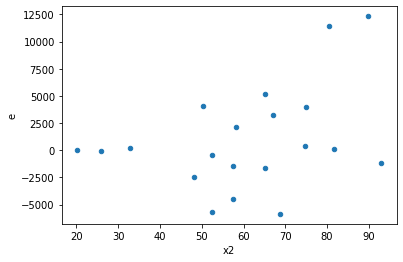

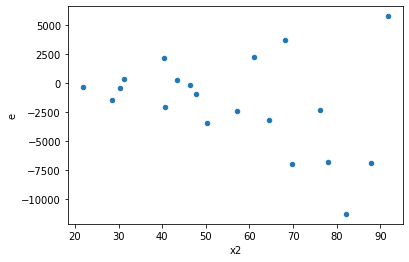

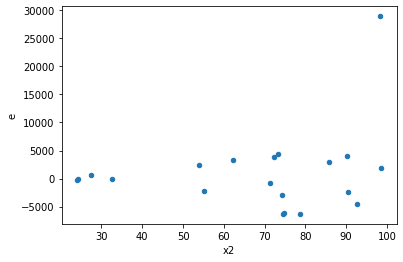

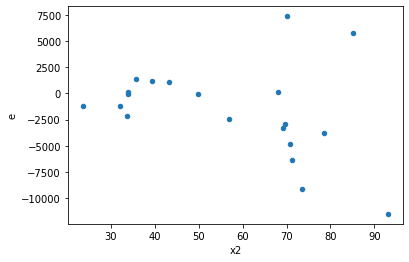

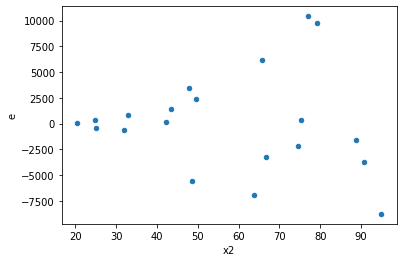

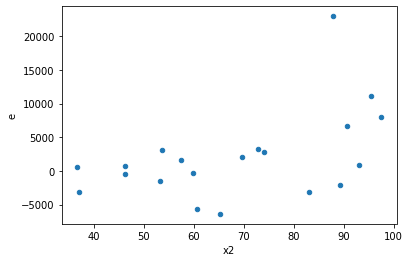

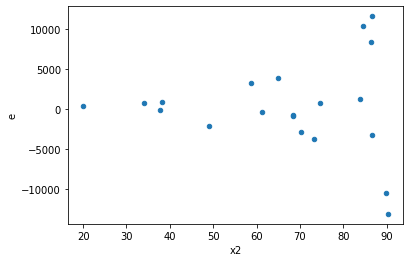

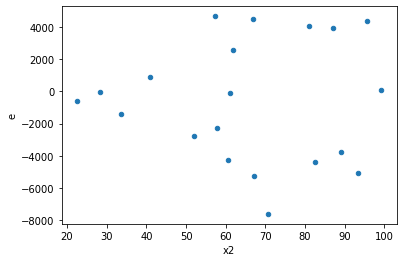

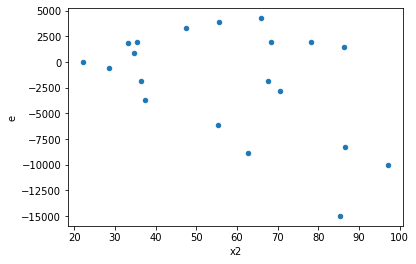

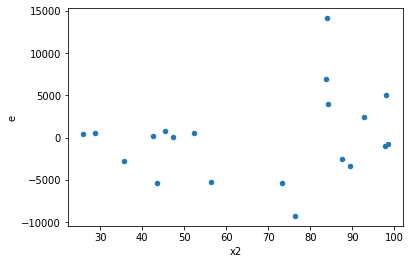

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,9630633.953727152,134923131.61450964,1605105.6589545254,22487188.602418274,14.009787129568249,0.005339043997672155,0.9973304780011639,0.0026695219988360774,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,6523097.973337019,36606679.4690973,1087182.99555617,6101113.244849551,5.6118549221130944,0.05444490624468856,0.9727775468776557,0.02722245312234428,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,5597953.193623996,135777468.03654042,932992.1989373327,22629578.00609007,24.254841607319864,0.0011690623395943511,0.9994154688302028,0.0005845311697971756,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,21202049.44247214,374424395.90241915,3533674.9070786904,62404065.98373652,17.659820901670415,0.002836128449688502,0.9985819357751557,0.001418064224844251,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,15369163.36634391,1098006954.6858144,2561527.227723985,183001159.1143024,71.44220726355735,5.152508242112219e-05,0.9999742374587894,2.5762541210561096e-05,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,30026384.703010764,257476042.0964464,5004397.450501794,42912673.68274107,8.574993114992932,0.019363125478425225,0.9903184372607874,0.009681562739212612,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,2366495.6091465857,414069293.6428101,394415.9348577643,69011548.94046836,174.9715030285365,3.639096827878774e-06,0.9999981804515861,1.819548413939387e-06,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,5091296.837305849,187692402.68213567,848549.4728843082,31282067.113689277,36.86534269753096,0.00035394787484599455,0.999823026062577,0.00017697393742299727,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,47189924.23262869,169362964.70103768,7864987.372104782,28227160.783506278,3.5889645396788845,0.14520726591530853,0.9273963670423457,0.07260363295765426,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,9630633.953727152,134923131.61450964,1605105.6589545254,22487188.602418274,14.009787129568249,0.005339043997672155,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,6523097.973337019,36606679.4690973,1087182.99555617,6101113.244849551,5.6118549221130944,0.05444490624468856,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,5597953.193623996,135777468.03654042,932992.1989373327,22629578.00609007,24.254841607319864,0.0011690623395943511,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,21202049.44247214,374424395.90241915,3533674.9070786904,62404065.98373652,17.659820901670415,0.002836128449688502,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,15369163.36634391,1098006954.6858144,2561527.227723985,183001159.1143024,71.44220726355735,5.152508242112219e-05,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,30026384.703010764,257476042.0964464,5004397.450501794,42912673.68274107,8.574993114992932,0.019363125478425225,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,2366495.6091465857,414069293.6428101,394415.9348577643,69011548.94046836,174.9715030285365,3.639096827878774e-06,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,5091296.837305849,187692402.68213567,848549.4728843082,31282067.113689277,36.86534269753096,0.00035394787484599455,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,47189924.23262869,169362964.70103768,7864987.372104782,28227160.783506278,3.5889645396788845,0.14520726591530853,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    877
Reject005=1 : Homoscedasticity      123
Name: Result_test, dtype: int64